<a href="https://colab.research.google.com/github/VeerrajuP/Veerraju_INFO5731_Fall2021/blob/master/In_class_exercise_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The seventh in-class-exercise (40 points in total, 10/20/2021)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (15 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [52]:
pip install pyLDAvis

In [58]:
import nltk; nltk.download('stopwords')
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
#pprint(data[:1])
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  
data_words = list(sent_to_words(reviewTitle))
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
print(data_words[:1])
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out
def m_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
data_words_nostops = remove_stopwords(data_words)
data_words_bigrams = m_bigrams(data_words_nostops)
nlp = spacy.load('en', disable=['parser', 'ner'])
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])
id2word = corpora.Dictionary(data_lemmatized)
texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1])
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[['next', 'phase']]
[['next', 'phase']]
[[(0, 1), (1, 1)]]
[(0,
  '0.528*"ring" + 0.009*"pleasantly" + 0.009*"expect" + 0.009*"pocket" + '
  '0.009*"love" + 0.009*"surprise" + 0.009*"epic" + 0.009*"know" + '
  '0.009*"sheer" + 0.009*"also"'),
 (1,
  '0.120*"superb" + 0.120*"stand" + 0.120*"alone" + 0.120*"yet" + 0.120*"year" '
  '+ 0.120*"late" + 0.006*"expect" + 0.006*"pleasantly" + 0.006*"know" + '
  '0.006*"love"'),
 (2,
  '0.156*"love" + 0.156*"expect" + 0.156*"pocket" + 0.156*"stay" + '
  '0.007*"surprise" + 0.007*"pleasantly" + 0.007*"screen" + 0.007*"sheer" + '
  '0.007*"also" + 0.007*"know"'),
 (3,
  '0.156*"boy" + 0.156*"bus" + 0.156*"whole" + 0.156*"family" + '
  '0.007*"pleasantly" + 0.007*"language" + 0.007*"pocket" + 0.007*"love" + '
  '0.007*"surprise" + 0.007*"epic"'),
 (4,
  '0.221*"time" + 0.221*"precious" + 0.011*"know" + 0.011*"pocket" + '
  '0.011*"love" + 0.011*"surprise" + 0.011*"pleasantly" + 0.011*"epic" + '
  '0.011*"sheer" + 0.011*"language"'),
 (5,
  '0.018*"

## (2) (15 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [16]:
# Write your code here
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt




In [20]:
def preprocess_data(docu_set):
    tokenizer = RegexpTokenizer(r'\w+')
    en_stop = set(stopwords.words('english'))
    p_stemmer = PorterStemmer()
    texts = []
    for i in docu_set:
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        stopped_tokens = [i for i in tokens if not i in en_stop]
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        texts.append(stemmed_tokens)
    return texts
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    dictionary = corpora.Dictionary(doc_clean)
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    return dictionary,doc_term_matrix
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
      model = LsiModel(doc_term_matrix, num_topics, id2word = dictionary)  # train model
      model_list.append(model)
      coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
      coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values
def graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,stop, start, step)
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

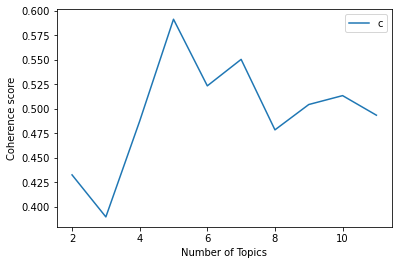

In [21]:
start,stop,step=2,12,1
clean_text=preprocess_data(reviewTitle)
graph(clean_text,start,stop,step)

## (3) (10 points) Compare the results generated by the two topic modeling algorithms, which one is better? You should explain the reasons in details.

In [ ]:
# Write your answer here (no code needed for this question)

Although the terms in both models are same, LSA has less measurements than LDA. LSA is a faster alternative of LDA. Both LSA (Latent SEmantic Analysis) and LDA (Latent Dynamic Analysis) have dealt with Natural Language Programming (Latent Dirichlet Allocation).
There is a bag of words in matrix format that serves as input for both LSA and LDA. LDA is concerned with topic modeling issues, whereas LSA is concerned with minimizing matrix dimension. If two words have the same meaning in LSA, they will appear in the same type of text. LDA is an unsupervised learning method that uses a topic model as an example, with each subject combining numerous models and each model combining various terms.
Between the terms in documents, the categories in this have the same likelihood. Both LDA and LSA employ a matrix with a bag of words as an input. The ideal problem for SVD is determining the number of dimensions. The high dimension uses more resources, while the low dimension uses less, yet the two may not be distinguishable. Topic model algorithms are statistical approaches for analyzing texts in order to discover and understand the topics that run through them, as well as how those themes are related to one another.

